In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
peliculas = pd.read_csv('data/peliculas.csv')
type(peliculas)
# resumen
# print(peliculas.head())
# dimensiones
# print(peliculas.shape)
# columnas
# print(peliculas.columns)
# cantidad de filas
# print(peliculas.index)

pandas.core.frame.DataFrame

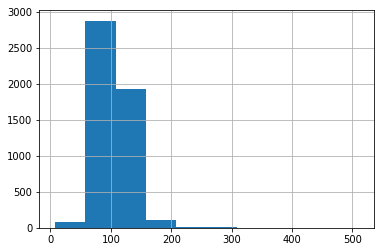

In [4]:
numcols = ['title_year', 'aspect_ratio', 'duration', 'duration.1', 'cast_total_facebook_likes', 'budget', 'imdb_score', 'gross']
# filtrar por columnas
peliculas_num = peliculas[numcols]
peliculas_num['duration'].hist()

In [5]:
ventas = pd.read_csv('data/thenumbers.csv')

In [6]:
ventas = ventas[['movie_title', 'production_budget', 'worldwide_gross']]

In [7]:
ventas.head()

,movie_title,production_budget,worldwide_gross
0,Avatar,425000000,2783918982
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225
2,Pirates of the Caribbean: At World's End,300000000,963420425
3,Spectre,300000000,879620923
4,The Dark Knight Rises,275000000,1084439099


In [8]:
peliculas.shape

(5043, 19)

In [9]:
ventas.shape

(4341, 3)

In [10]:
ventacols = ['movie_tile']

In [11]:
peliculas_num = pd.concat([peliculas_num, peliculas['movie_title']], axis=1)

In [12]:
peliculas_v2 = pd.merge(ventas, peliculas_num, on='movie_title', how='left')

In [13]:
peliculas_v2.shape

(4385, 11)

In [14]:
help(pd.Series.value_counts)

Help on function value_counts in module pandas.core.base:

value_counts(self, normalize=False, sort=True, ascending=False, bins=None, dropna=True)
    Returns object containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : boolean, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : boolean, default True
        Sort by values
    ascending : boolean, default False
        Sort in ascending order
    bins : integer, optional
        Rather than count values, group them into half-open bins,
        a convenience for pd.cut, only works with numeric data
    dropna : boolean, default True
        Don't include counts of NaN.
    
    Returns
    -------
    counts : Series



In [15]:
peliculas_v2.notnull().apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714


In [16]:
(peliculas_v2 != 0).apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0


In [17]:
available = ((peliculas_v2 != 0) & (peliculas_v2.notnull()))

In [18]:
available.all(axis=1).value_counts()

True     3408
False     977
dtype: int64

In [19]:
mask = available['worldwide_gross']
peliculas_v2 = peliculas_v2[mask]

In [20]:
((peliculas_v2 != 0) & (peliculas_v2.notnull())).worldwide_gross.value_counts()

True    4104
Name: worldwide_gross, dtype: int64

In [21]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=1)

In [22]:
peliculas_v2 = peliculas_v2.drop('movie_title', axis=1)

In [23]:
peliculas_v2 = peliculas_v2.drop('duration', axis=1)

In [25]:
peliculas_v2.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000,2783918982,2009.0,1.78,178.0,4834,237000000.0,7.9,760505847.0
1,306000000,2058662225,NaN,NaN,NaN,143,NaN,7.1,NaN
2,300000000,963420425,2007.0,2.35,169.0,48350,300000000.0,7.1,309404152.0
3,300000000,879620923,2015.0,2.35,148.0,11700,245000000.0,6.8,200074175.0
4,275000000,1084439099,2012.0,2.35,164.0,106759,250000000.0,8.5,448130642.0


In [24]:
values = imputer.fit_transform(peliculas_v2)

In [26]:
peliculas_v2.values

array([[  4.25000000e+08,   2.78391898e+09,   2.00900000e+03, ...,
          2.37000000e+08,   7.90000000e+00,   7.60505847e+08],
       [  3.06000000e+08,   2.05866222e+09,              nan, ...,
                     nan,   7.10000000e+00,              nan],
       [  3.00000000e+08,   9.63420425e+08,   2.00700000e+03, ...,
          3.00000000e+08,   7.10000000e+00,   3.09404152e+08],
       ..., 
       [  7.00000000e+03,   9.00000000e+02,   2.00500000e+03, ...,
          3.25000000e+03,   7.80000000e+00,              nan],
       [  3.96700000e+03,   1.04430000e+04,   2.01200000e+03, ...,
                     nan,   6.30000000e+00,   1.04430000e+04],
       [  1.10000000e+03,   1.81041000e+05,   2.00400000e+03, ...,
          1.10000000e+03,   6.60000000e+00,   8.52220000e+04]])

In [27]:
values

array([[  4.25000000e+08,   2.78391898e+09,   2.00900000e+03, ...,
          2.37000000e+08,   7.90000000e+00,   7.60505847e+08],
       [  3.06000000e+08,   2.05866222e+09,   5.91165594e+08, ...,
          5.91165594e+08,   7.10000000e+00,   5.91165594e+08],
       [  3.00000000e+08,   9.63420425e+08,   2.00700000e+03, ...,
          3.00000000e+08,   7.10000000e+00,   3.09404152e+08],
       ..., 
       [  7.00000000e+03,   9.00000000e+02,   2.00500000e+03, ...,
          3.25000000e+03,   7.80000000e+00,   1.90568571e+03],
       [  3.96700000e+03,   1.04430000e+04,   2.01200000e+03, ...,
          3.66995625e+03,   6.30000000e+00,   1.04430000e+04],
       [  1.10000000e+03,   1.81041000e+05,   2.00400000e+03, ...,
          1.10000000e+03,   6.60000000e+00,   8.52220000e+04]])

In [28]:
x = pd.DataFrame(values)

In [29]:
x.columns = peliculas_v2.columns

In [30]:
x.index = peliculas_v2.index

In [31]:
x.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2.009000e+03,1.780000e+00,1.780000e+02,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,5.911656e+08,5.911656e+08,5.911656e+08,143.0,5.911656e+08,7.1,5.911656e+08
2,300000000.0,9.634204e+08,2.007000e+03,2.350000e+00,1.690000e+02,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2.015000e+03,2.350000e+00,1.480000e+02,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2.012000e+03,2.350000e+00,1.640000e+02,106759.0,2.500000e+08,8.5,4.481306e+08


In [33]:
x.to_csv('data/intermediate_results.csv', index=False)